In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('all_model_nlp.csv')

models = {
        'mf':['$\it{mf}$',sns.color_palette("tab10")[0],'Model-Free'],
        'mb':['$\it{mb}$',sns.color_palette("tab10")[1],'Model-Based'],
        'habit':['$\it{habit}$',sns.color_palette("tab10")[2],'Habit'],
        'wsls':['$\it{wsls}$',sns.color_palette("tab10")[3],'Win Stay, Lose Shift'],
        'kdh':['$\it{kDH}$',sns.color_palette("tab10" )[4],'k-Dominant Hand'],
        'regression':['$\it{LR}$',sns.color_palette("tab10")[7]],
        'rnn':['$\it{ RNN }$',sns.color_palette("tab10")[8]]
}

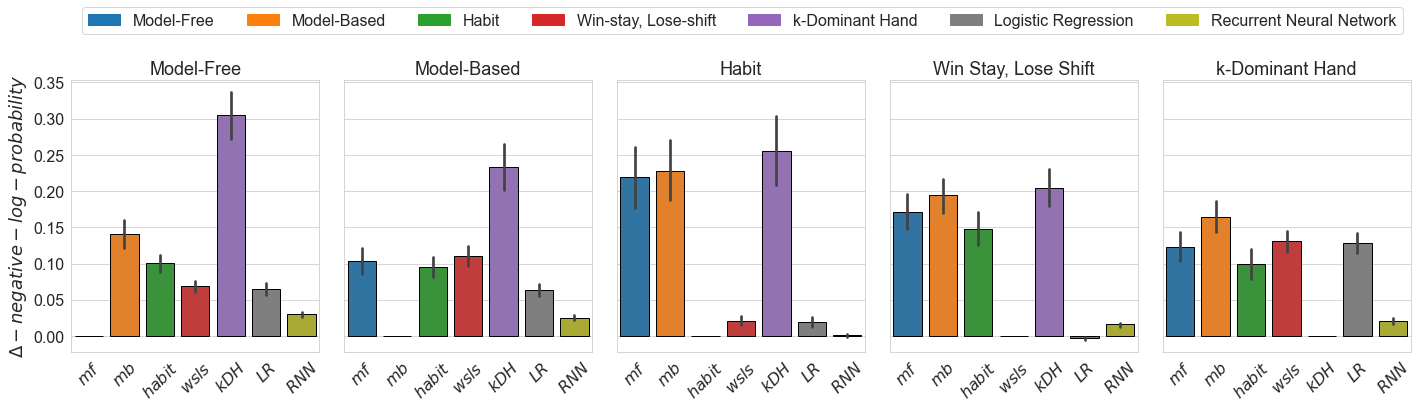

In [3]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24, 5))
gs = fig.add_gridspec(1,5, hspace=0, wspace=0.1 )
axes = gs.subplots(sharey=True)

for i,m in enumerate(models):
    if i == 5:
        break
    
    data = df.iloc[i*100:i*100+100]
    columns_titles = ['test_nlp_mf', 'test_nlp_mb', 'test_nlp_habit',
                      'test_nlp_wsls','test_nlp_kdh', 
                      'test_nlp_logistic_regression', 'best_test_nlp_rnn']
    
    data = data.reindex(columns=columns_titles)

    x = [i.split('_')[-1] for i in data.columns]
    cc = [models[i][1] for i in x]
    names = [models[i][0] for i in x]
    
    data = data.sub(data[f'test_nlp_{m}'],axis=0)
    sns.barplot(ax=axes[i],data=data,palette=cc,edgecolor="black")
    axes[i].set_xticklabels(names,size=16,rotation=45)
    axes[i].set_title(models[m][2],size=18)
        
axes[0].set_ylabel('$\it{Δ-negative-log-probability}$',size=18)
axes[0].tick_params(axis='y', which='major', labelsize=16)

a = mpatches.Patch(color=models['mf'][1], label='Model-Free')
b = mpatches.Patch(color=models['mb'][1], label='Model-Based')
c = mpatches.Patch(color=models['habit'][1], label='Habit')
d = mpatches.Patch(color=models['wsls'][1], label='Win-stay, Lose-shift')
e = mpatches.Patch(color=models['kdh'][1], label='k-Dominant Hand')
f = mpatches.Patch(color=models['regression'][1], label='Logistic Regression')
g = mpatches.Patch(color=models['rnn'][1], label='Recurrent Neural Network')
axes[2].legend(handles=[a,b,c,d,e,f,g],fontsize=16, ncol = 7,bbox_to_anchor=(3.2, 1.3))